In [58]:
# Objective: Generate the stars centered around all of the vertices of the path from the root to the left from the left hand side.

from functools import lru_cache
from sage.all import *
import math

In [53]:
# NOTE: This will generate for n + 1
def perfect_binary_tree_generator(n):
    if n == 0:
        return Graph()
    else:
        g = Graph()

        g.add_vertices([2^n])
        
        for j in range(2^(n - 1) - 1, 2^(n - 1) + n - 1):
             g.add_edge(j, 2*j + 1, f'{j} to {2*j + 1}')
            
        for i in range(2^n - 1):
            g.add_edge(i, 2*i + 1,  f'{i} to {2*i + 1}')
            g.add_edge(i, 2*i + 2, f'{i} to {2*i + 1}')
            
        for j in range(2^(n-1) - 1, 2^n - 1):
            g.add_edge(j, 2*j + 1,  f'{j} to {2*j + 1}')
            
        return g.copy(immutable=True)
        
# Get the path from the root to the last depth leaf vertex
def get_canonical_path(d):
    v = []
    last_v_index = 0
    v.append(last_v_index)
    for j in range(1, d + 1):
        last_v_index = pow(2,j)
        v.append(v[j - 1] + last_v_index)
    return v

def perfect_binary_tree_plot(tree):
    tree_layout = tree.layout(layout='tree', orientation='bottom-top')
    tree.show(layout="tree", tree_root=0, figsize=[15, 15]) # 8x8 inches

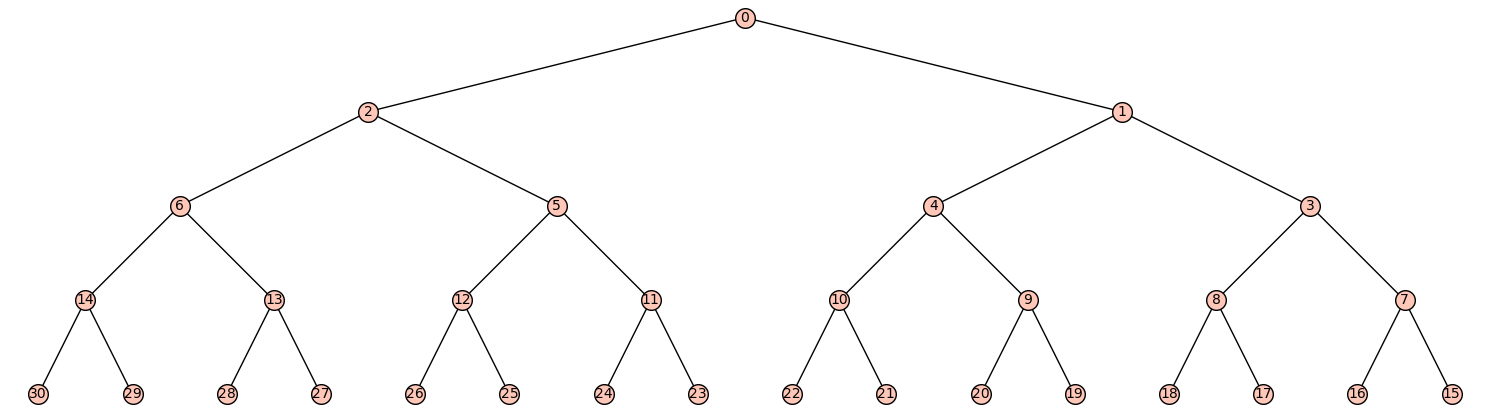

[0, 2, 6, 14, 30]


In [54]:
d = 4
tree = perfect_binary_tree_generator(d)
perfect_binary_tree_plot(tree)
print(get_canonical_path(d))

In [55]:
@lru_cache(maxsize=None)
def independent_sets_of_size(tree, vertex, size):
    """
    Find all independent sets of a specific size in the tree containing a given vertex.
    """
    independent_sets = [
        iset for iset in IndependentSets(tree) if vertex in iset and len(iset) == size
    ]
    return independent_sets


def analyze_independent_sets(d, size):
    """
    Analyze independent sets of a specific size in a perfect binary tree of depth `d`,
    for each vertex in the canonical path.
    """
    tree = perfect_binary_tree_generator(d) 

    # Canonical path: From root to leftmost leaf
    canonical_path = get_canonical_path(d)

    # Analyze each vertex in the canonical path
    results = {}
    for vertex in canonical_path:
        sets = independent_sets_of_size(tree, vertex, size)
        results[vertex] = len(sets)
    
    return results


In [76]:
depth = 4  # NOTE: DEPTH IS ACTUALLY GOING TO BE 4 + 1 = 5
size = 3   # Star size

results = analyze_independent_sets(depth, size)
i = 1
for vertex, count in results.items():
    print(f"Vertex {vertex} | DEPTH {i}: {count} independent sets of size {size}")
    i += 1

Vertex 0 | DEPTH 1: 354 independent sets of size 3
Vertex 2 | DEPTH 2: 329 independent sets of size 3
Vertex 6 | DEPTH 3: 330 independent sets of size 3
Vertex 14 | DEPTH 4: 326 independent sets of size 3
Vertex 30 | DEPTH 5: 379 independent sets of size 3
